In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

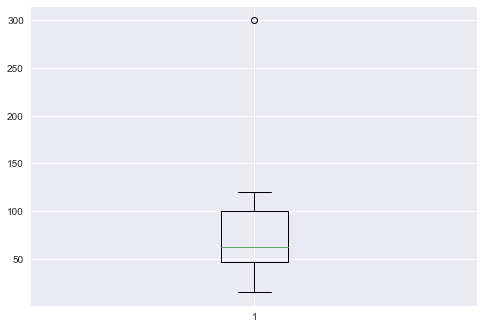

In [67]:
# create data
prices = pd.Series([15, 45, 50, 120, 300, 34, 55, 70, 105, 85])
# box plot
plt.boxplot(prices)
plt.show()

In [68]:
prices.describe()

count     10.000000
mean      87.900000
std       81.115076
min       15.000000
25%       46.250000
50%       62.500000
75%      100.000000
max      300.000000
dtype: float64

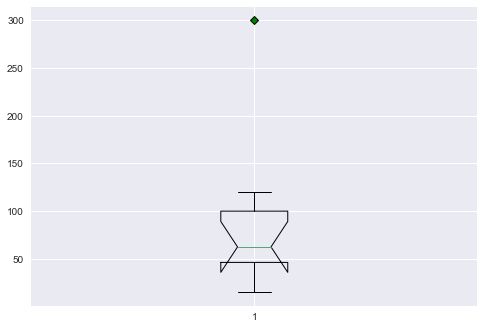

In [69]:
# Have notch at median, change outlier symbol
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(prices, notch=True, flierprops = green_diamond)
plt.show()

In [70]:
import scipy.stats
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [71]:
mean_confidence_interval(prices)

(87.9, 29.87377020181505, 145.92622979818498)

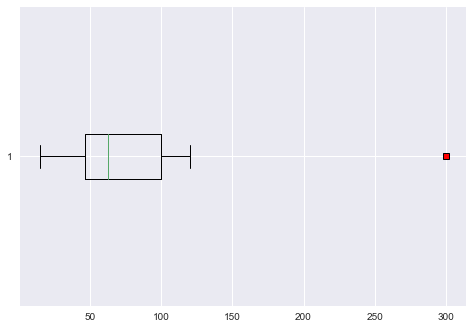

In [72]:
# Horizontal Boxes
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(prices, vert=False, flierprops=red_square)
plt.show()

In [73]:
df = pd.read_csv('data/insurance.csv')

In [74]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


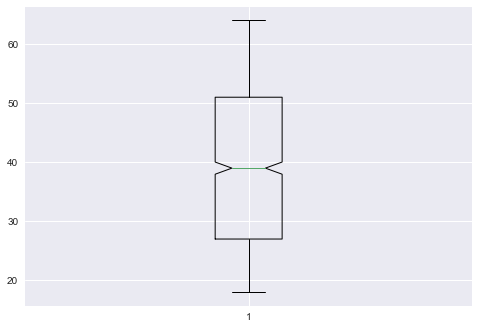

In [75]:
plt.boxplot(df['age'], notch=True)
plt.show()

In [76]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [77]:
mean_confidence_interval(df['age'])

(39.20702541106129, 38.453516373452935, 39.96053444866964)

In [78]:
df_meal = pd.read_csv('data/meal_info.csv') 
df_center = pd.read_csv('data/fulfilment_center_info.csv') 
df_food = pd.read_csv('data/train_food.csv')

In [79]:
df = pd.merge(df_food, df_center, on='center_id') 
df = pd.merge(df,df_meal, on='meal_id')

In [80]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [81]:
df['base_price'].describe()

count    456548.000000
mean        354.156627
std         160.715914
min          55.350000
25%         243.500000
50%         310.460000
75%         458.870000
max         866.270000
Name: base_price, dtype: float64

In [82]:
df['base_price'].skew() # >0 : lệch phải

0.6376608741298384

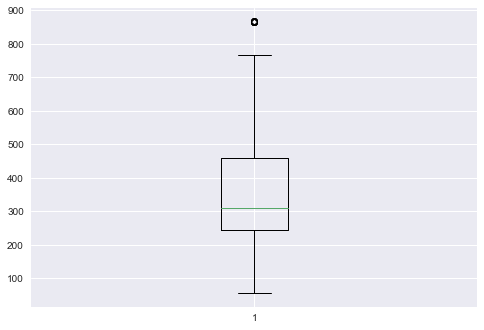

In [83]:
plt.boxplot(x=df['base_price'])
plt.grid(True)
plt.show()

In [84]:
c_price = {}
for i in df['cuisine'].unique():
    c_price[i] = df[df['cuisine']==i].base_price

In [85]:
c_price.keys()

dict_keys(['Thai', 'Indian', 'Italian', 'Continental'])

In [86]:
c_price['Thai']

0         152.29
1         152.29
2         133.92
3         134.86
4         147.50
           ...  
454186    194.00
454187    194.00
454188    194.00
454189    196.00
454190    195.00
Name: base_price, Length: 118216, dtype: float64

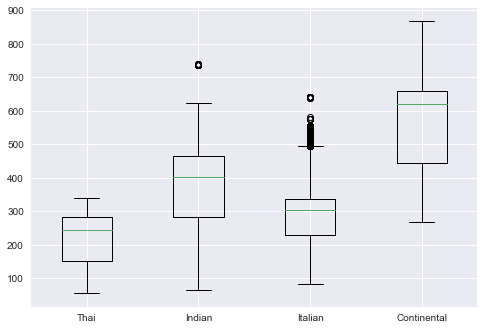

In [87]:
plt.boxplot(x=c_price.values(), labels=c_price.keys())
plt.grid(True)
plt.show()

In [88]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E']) # 10 dòng, 5 cột
df

,A,B,C,D,E
0,0.023410,0.872057,0.800370,0.410958,0.959164
1,0.152994,0.103772,0.260967,0.249005,0.831032
2,0.946467,0.961933,0.468715,0.135050,0.163552
3,0.809170,0.444147,0.469570,0.304980,0.416978
4,0.392839,0.842259,0.466598,0.252990,0.868474
5,0.107674,0.352245,0.109189,0.304933,0.943237
6,0.457869,0.891131,0.442065,0.114951,0.119897
7,0.138192,0.691082,0.967155,0.840769,0.203936
8,0.950863,0.775236,0.054293,0.307415,0.209023
9,0.282381,0.584971,0.282103,0.665200,0.360721


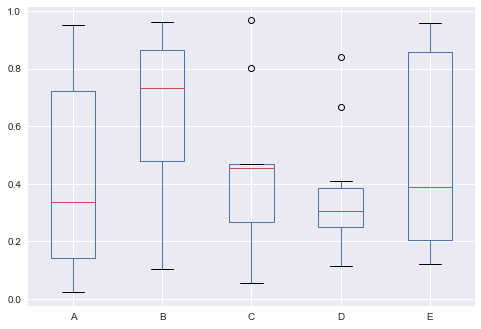

In [89]:
df.plot.box(grid=True);

In [90]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [91]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


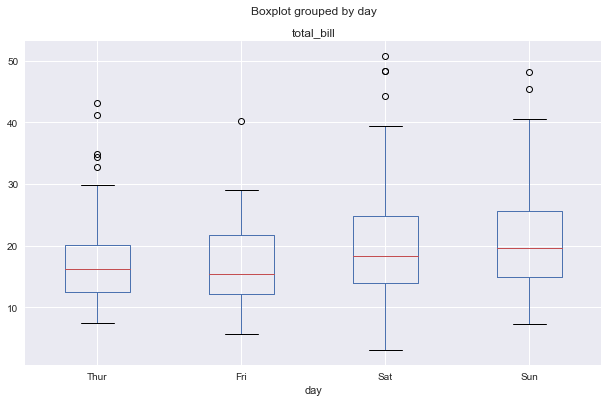

In [92]:
tips.boxplot(by ='day', column =['total_bill'], grid = True, figsize=(10,6));

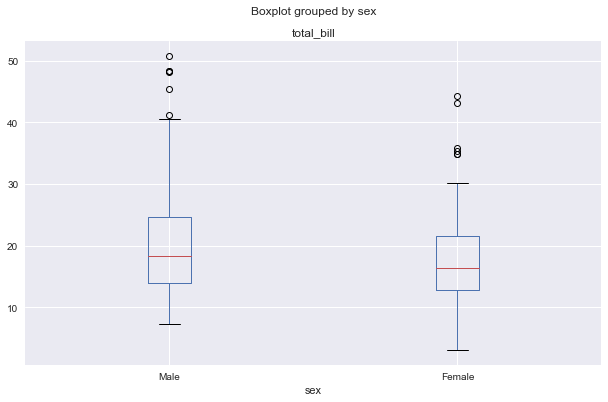

In [93]:
tips.boxplot(by ='sex', column =['total_bill'], grid = True, figsize=(10,6));